In [1]:
from NN import LayerNetwork
from Gate import *
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import logging
logging.basicConfig(level=logging.WARN)

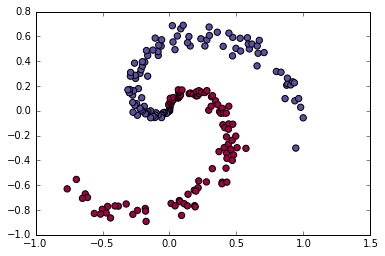

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

In [3]:
#data, labels = make_classification(50, nfeatures, nfeatures, 0, n_clusters_per_class=2)
#data = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
#labels = np.array([1, -1, -1, 1])
data = X
labels = y

In [4]:
data = np.array([[x[0], x[1], x[1]**2, x[1]**2] for x in data])

Done 0 training rounds (0 runs)
Done 10 training rounds (2000 runs)
Done 20 training rounds (4000 runs)
Done 30 training rounds (6000 runs)
Done 40 training rounds (8000 runs)
Done 50 training rounds (10000 runs)
Done 60 training rounds (12000 runs)
Done 70 training rounds (14000 runs)
Done 80 training rounds (16000 runs)
Done 90 training rounds (18000 runs)
Done 99 training rounds (19800 runs)


/Users/tom/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


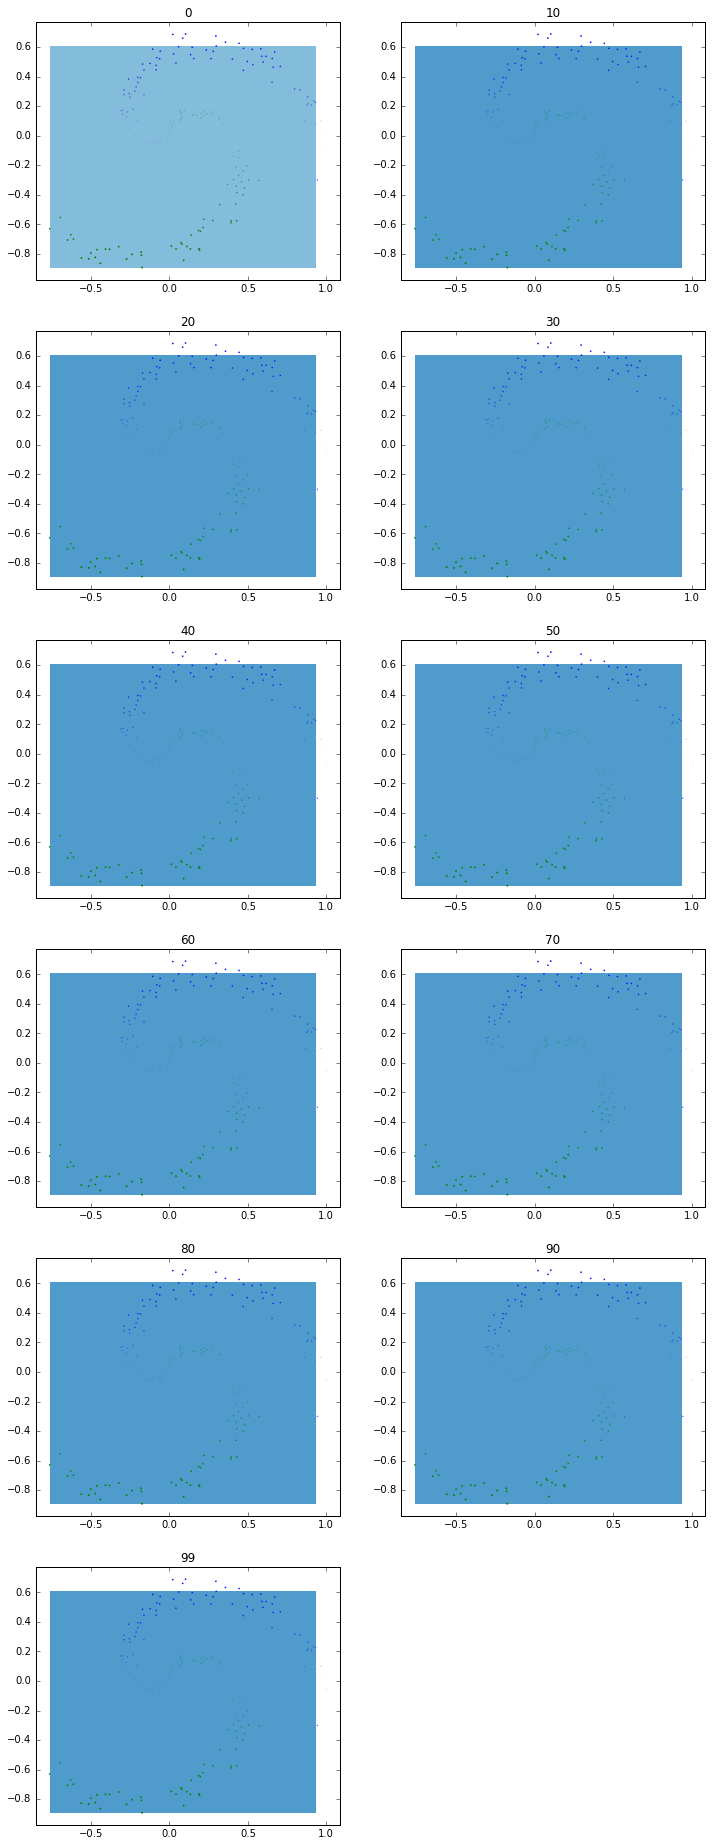

In [7]:
nfeatures = 4
model = LayerNetwork(nfeatures, layers=[8, 2], ActivationGate=SigmoidGate)

colors = ['blue' if x == 1 else 'green' for x in labels]

def eval_model(data, labels, model):
    return sum([model.predict(*d) == l for d, l in zip(data, labels)]) * 100. / len(labels)

nplots = 10
niter = 100
plot_freq = niter // nplots

fsize = 6
fig = plt.figure(figsize=(fsize * 2, fsize*nplots))
pn = 1
for i in range(niter):
    # Train on all the data in this iteration
    for d, l in zip(data, labels):
        model.train(d, l)
    
    if i % plot_freq == 0 or i == niter - 1:
        print("Done %d training rounds (%i runs)" % (i, i * len(labels)))
        
        ax = fig.add_subplot(nplots + 1, 2, pn)
        
        pn += 1

        x_min, y_min = data.min(0)[:2]
        x_max, y_max = data.max(0)[:2]
        h = 0.1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        Z = np.array([model.predict([vals[0], vals[1], vals[0]**2, vals[1]**2]) for vals in np.c_[xx.ravel(), yy.ravel()]])
        Z = Z.reshape(xx.shape)
        #print(Z)
        ax.contourf(xx, yy, Z, cmap='Blues')

        ax.scatter(*data.T, color=colors)
        ax.set_title("%d" % i)
fig.show()

In [6]:
model.ucreator.print_nodes()

Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0
Value: 0.0, Grad: 0.0 (c0)
Value: 0.0, Grad: 0.0 (c0)
Value: 0.0, Grad: 0.0 (c1)
Value: 0.0, Grad: 0.0 (c1)
Value: 0.0, Grad: 0.0 (c2)
Value: 0.0, Grad: 0.0 (c2)
Value: 0.0, Grad: 0.0 (c3)
Value: 0.0, Grad: 0.0 (c3)
Value: 0.0, Grad: 0.0 (c4)
Value: 0.0, Grad: 0.0 (c4)
Value: 0.0, Grad: 0.0 (c5)
Value: 0.0, Grad: 0.0 (c5)
Value: 0.0, Grad: 0.0 (c6)
Value: 0.0, Grad: 0.0 (c6)
Value: 0.0, Grad: 0.0 (c7)
Value: 0.0, Grad: 0.0 (c7)
Value: 0.936063043406, Grad: -0.998400563084 (i0)
Value: 0.607871558261, Grad: 0.0565359676155 (i1)
Value: 0.876214021231, Grad: